## Importing the libraries

In [ ]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# train test split, hyper parameter tuning
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, RepeatedKFold, cross_val_score

# accuracy check
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# applying random forest and feature selection
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

from sklearn.tree import DecisionTreeRegressor

# encoding for categorical variables 
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, LinearRegression

## Import the dataset and create dataframe 

> Here train and test sets are seperate because the data is time related. Therefore, the data from 2015 to 2017 is considered as the train set and data from 2018 as the test set

In [ ]:
avo = pd.read_csv('/content/FinalWithNoOut.csv')

In [ ]:
avo_without = pd.read_csv('/content/Final.csv')

In [ ]:
avo.head()

,Unnamed: 0,X,Date,AveragePrice,Total.Volume,X4046,X4225,X4770,Total.Bags,Small.Bags,Large.Bags,type,region,Year,Month,Day,first_lag,Fifthlag_XL.Bag,Time_Index
0,541,540,2015-02-08,0.99,10.844548,7.214777,10.574231,5.107459,9.270828,9.221785,6.235273,conventional,Albany,2015,2,8,1.247037,1.477449,1
1,542,541,2015-02-08,1.03,12.980532,12.840686,9.750599,6.266916,10.569833,9.800702,9.947398,conventional,Atlanta,2015,2,8,1.247037,1.477449,1
2,543,542,2015-02-08,1.09,13.647010,11.180323,13.226470,10.530477,12.105893,12.076951,8.549383,conventional,BaltimoreWashington,2015,2,8,1.247037,1.477449,1
3,544,543,2015-02-08,1.07,11.155833,10.901014,9.174634,8.022569,8.022625,7.226514,7.424016,conventional,Boise,2015,2,8,1.247037,1.477449,1
4,545,544,2015-02-08,1.04,13.321190,8.943139,13.113794,5.955138,11.573256,11.565569,6.703605,conventional,Boston,2015,2,8,1.247037,1.477449,1


In [ ]:
avo.shape

(17506, 19)

In [ ]:
avo_without.shape

(17709, 19)

In [ ]:
# train = df.loc[0:14166]

In [ ]:
# test = df.loc[14167:]

In [ ]:
# train.shape

In [ ]:
# test.shape

In [ ]:
# plt.hist(train.AveragePrice, edgecolor='blue', color='pink', linestyle='dashed', bins=30)
# plt.xlabel('Average Price')
# plt.ylabel('Count')
# plt.title('Histogram of Average price without outliers')
# plt.grid(color='red', linestyle=':')
# plt.figure(figsize=(10, 10))

In [ ]:
# train = pd.read_csv('/content/timevariableadded_removedoutlier.csv')
# test = pd.read_csv('/content/testdataforproject2ndfile.csv')

In [ ]:
# train.drop(['log.Total_Bags', 'Date_Ex'], axis=1, inplace=True)
#test.drop(['log.Total_Bags', 'Date_Ex'], axis=1, inplace=True)

In [ ]:
# train.head()

In [ ]:
# train.tail()

In [ ]:
# test.head()

In [ ]:
# test.tail()

### Feature information

In [ ]:
# train.info()

In [ ]:
# test.info()

> test set has 3581 observations

In [ ]:
# frame = [train, test]
# avo = pd.concat(frame, ignore_index=True)

In [ ]:
# avo.head()

> the descriptive analysis did not show an exact pattern for Date_Ex variable. And total_bags is the summation of small_Bags, Large_Bags and XLarge_Bags. Therefore, Date_Ex and Total_Bags can be removed. 

In [ ]:
# avo.shape

> Apply label encoding for region and type variables

> Did not apply One Hot Encoding because there are 54 unique categories and it will lead in creating many columns. Therefore, used Label Encoding from 0-53

In [ ]:
le = LabelEncoder()

In [ ]:
# Fit and transformed the regions into numeric
# le.fit_transform(avo.region)
# le.fit_transform(avo.type)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
# x = le.fit_transform(avo.region)
# y = le.fit_transform(avo.type)

In [ ]:
# df = pd.DataFrame({'Actual':avo.region, "Predicted":x})
# df.head(55)

,Actual,Predicted
0,Albany,0
1,Atlanta,1
2,BaltimoreWashington,2
3,Boise,3
4,Boston,4
5,BuffaloRochester,5
6,California,6
7,Charlotte,7
8,Chicago,8
9,CincinnatiDayton,9


In [ ]:
avo.region = le.fit_transform(avo.region)
avo.type = le.fit_transform(avo.type)

In [ ]:
avo_without.region = le.fit_transform(avo_without.region)
avo_without.type = le.fit_transform(avo_without.type)

In [ ]:
avo.head()

,Unnamed: 0,X,Date,AveragePrice,Total.Volume,X4046,X4225,X4770,Total.Bags,Small.Bags,Large.Bags,type,region,Year,Month,Day,first_lag,Fifthlag_XL.Bag,Time_Index
0,541,540,2015-02-08,0.99,10.844548,7.214777,10.574231,5.107459,9.270828,9.221785,6.235273,0,0,2015,2,8,1.247037,1.477449,1
1,542,541,2015-02-08,1.03,12.980532,12.840686,9.750599,6.266916,10.569833,9.800702,9.947398,0,1,2015,2,8,1.247037,1.477449,1
2,543,542,2015-02-08,1.09,13.647010,11.180323,13.226470,10.530477,12.105893,12.076951,8.549383,0,2,2015,2,8,1.247037,1.477449,1
3,544,543,2015-02-08,1.07,11.155833,10.901014,9.174634,8.022569,8.022625,7.226514,7.424016,0,3,2015,2,8,1.247037,1.477449,1
4,545,544,2015-02-08,1.04,13.321190,8.943139,13.113794,5.955138,11.573256,11.565569,6.703605,0,4,2015,2,8,1.247037,1.477449,1


In [ ]:
# dict(zip(le.classes_,range(len(le.classes_))))

{0: 0, 1: 1}

In [ ]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17506 entries, 0 to 17505
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       17506 non-null  int64  
 1   X                17506 non-null  int64  
 2   Date             17506 non-null  object 
 3   AveragePrice     17506 non-null  float64
 4   Total.Volume     17506 non-null  float64
 5   X4046            17506 non-null  float64
 6   X4225            17506 non-null  float64
 7   X4770            17506 non-null  float64
 8   Total.Bags       17506 non-null  float64
 9   Small.Bags       17506 non-null  float64
 10  Large.Bags       17506 non-null  float64
 11  type             17506 non-null  int64  
 12  region           17506 non-null  int64  
 13  Year             17506 non-null  int64  
 14  Month            17506 non-null  int64  
 15  Day              17506 non-null  int64  
 16  first_lag        17506 non-null  float64
 17  Fifthlag_XL.

In [ ]:
avo_without.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17709 entries, 0 to 17708
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       17709 non-null  int64  
 1   X                17709 non-null  int64  
 2   Date             17709 non-null  object 
 3   AveragePrice     17709 non-null  float64
 4   Total.Volume     17709 non-null  float64
 5   X4046            17709 non-null  float64
 6   X4225            17709 non-null  float64
 7   X4770            17709 non-null  float64
 8   Total.Bags       17709 non-null  float64
 9   Small.Bags       17709 non-null  float64
 10  Large.Bags       17709 non-null  float64
 11  type             17709 non-null  int64  
 12  region           17709 non-null  int64  
 13  Year             17709 non-null  int64  
 14  Month            17709 non-null  int64  
 15  Day              17709 non-null  int64  
 16  first_lag        17709 non-null  float64
 17  Fifthlag_XL.

In [ ]:
avo.drop(['Unnamed: 0', 'X', 'Date'], axis=1, inplace=True)

In [ ]:
avo_without.drop(['Unnamed: 0', 'X', 'Date'], axis=1, inplace=True)

## Feature selection

In [ ]:
# Seperating the independent variables by dropping target variable 'AveragePrice'
x = avo.drop('AveragePrice', axis=1)

In [ ]:
a =  avo_without.drop('AveragePrice', axis=1)

In [ ]:
a

,Total.Volume,X4046,X4225,X4770,Total.Bags,Small.Bags,Large.Bags,type,region,Year,Month,Day,first_lag,Fifthlag_XL.Bag,Time_Index
0,10.844548,7.214777,10.574231,5.107459,9.270828,9.221785,6.235273,0,0,2015,2,8,1.247037,1.477449,1
1,12.980532,12.840686,9.750599,6.266916,10.569833,9.800702,9.947398,0,1,2015,2,8,1.247037,1.477449,1
2,13.647010,11.180323,13.226470,10.530477,12.105893,12.076951,8.549383,0,2,2015,2,8,1.247037,1.477449,1
3,11.155833,10.901014,9.174634,8.022569,8.022625,7.226514,7.424016,0,3,2015,2,8,1.247037,1.477449,1
4,13.321190,8.943139,13.113794,5.955138,11.573256,11.565569,6.703605,0,4,2015,2,8,1.247037,1.477449,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17704,9.582143,4.393832,5.013099,0.693147,9.566486,9.209771,8.363072,1,49,2018,3,25,1.313704,3.830688,164
17705,9.213185,4.942713,6.653147,0.693147,9.118129,9.013208,6.813774,1,50,2018,3,25,1.313704,3.830688,164
17706,14.260175,11.703628,12.745063,6.977505,13.905226,13.713231,12.159735,1,51,2018,3,25,1.313704,3.830688,164
17707,12.512539,10.203528,11.262711,4.783818,12.024250,11.374927,11.283479,1,52,2018,3,25,1.313704,3.830688,164


In [ ]:
x

,Total.Volume,X4046,X4225,X4770,Total.Bags,Small.Bags,Large.Bags,type,region,Year,Month,Day,first_lag,Fifthlag_XL.Bag,Time_Index
0,10.844548,7.214777,10.574231,5.107459,9.270828,9.221785,6.235273,0,0,2015,2,8,1.247037,1.477449,1
1,12.980532,12.840686,9.750599,6.266916,10.569833,9.800702,9.947398,0,1,2015,2,8,1.247037,1.477449,1
2,13.647010,11.180323,13.226470,10.530477,12.105893,12.076951,8.549383,0,2,2015,2,8,1.247037,1.477449,1
3,11.155833,10.901014,9.174634,8.022569,8.022625,7.226514,7.424016,0,3,2015,2,8,1.247037,1.477449,1
4,13.321190,8.943139,13.113794,5.955138,11.573256,11.565569,6.703605,0,4,2015,2,8,1.247037,1.477449,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17501,9.582143,4.393832,5.013099,0.693147,9.566486,9.209771,8.363072,1,49,2018,3,25,1.313704,3.830688,164
17502,9.213185,4.942713,6.653147,0.693147,9.118129,9.013208,6.813774,1,50,2018,3,25,1.313704,3.830688,164
17503,14.260175,11.703628,12.745063,6.977505,13.905226,13.713231,12.159735,1,51,2018,3,25,1.313704,3.830688,164
17504,12.512539,10.203528,11.262711,4.783818,12.024250,11.374927,11.283479,1,52,2018,3,25,1.313704,3.830688,164


In [ ]:
# Seperating the target variable 
y =avo.AveragePrice

In [ ]:
b = avo_without.AveragePrice

In [ ]:
b

0        0.99
1        1.03
2        1.09
3        1.07
4        1.04
         ... 
17704    1.04
17705    1.41
17706    1.55
17707    1.60
17708    1.62
Name: AveragePrice, Length: 17709, dtype: float64

In [ ]:
y

0        0.99
1        1.03
2        1.09
3        1.07
4        1.04
         ... 
17501    1.04
17502    1.41
17503    1.55
17504    1.60
17505    1.62
Name: AveragePrice, Length: 17506, dtype: float64

In [ ]:
# Apply Extra Tree Regressor to select important features
etr = ExtraTreesRegressor()

In [ ]:
etr.fit(x,y)

ExtraTreesRegressor()

In [ ]:
# Feature coefficients
etr.feature_importances_

array([0.03481154, 0.0656639 , 0.06336172, 0.03738461, 0.03895176,
       0.03220602, 0.07971609, 0.38076618, 0.05008465, 0.02148411,
       0.02239696, 0.00785722, 0.10516259, 0.02117872, 0.03897395])

In [ ]:
important_features = pd.Series(etr.feature_importances_, index=x.columns)

In [ ]:
important_features

Total.Volume       0.034812
X4046              0.065664
X4225              0.063362
X4770              0.037385
Total.Bags         0.038952
Small.Bags         0.032206
Large.Bags         0.079716
type               0.380766
region             0.050085
Year               0.021484
Month              0.022397
Day                0.007857
first_lag          0.105163
Fifthlag_XL.Bag    0.021179
Time_Index         0.038974
dtype: float64

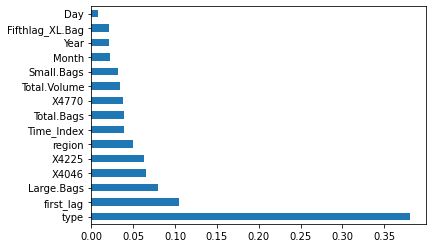

In [ ]:
important_features.nlargest(15).plot(kind='barh')

In [ ]:
# New training features 
new_x = avo[list(important_features.nlargest(15).index)]

> feature and response train, test split

In [ ]:
# x_train = new_x.loc[0:14329]
# x_test = new_x.loc[14330:]
# y_train = y.loc[0:14329]
# y_test = y.loc[14330:]
# train = df.loc[0:14166]
x_train = new_x.loc[0:13736]
x_test = new_x.loc[13737:]
y_train = y.loc[0:13736]
y_test = y.loc[13737:]

In [ ]:
# with outlier 
x_train = new_x.loc[0:14166]
x_test = new_x.loc[14167:]
y_train = y.loc[0:14166]
y_test = y.loc[14167:]

In [ ]:
x_train.tail()

,type,first_lag,Large.Bags,X4046,X4225,region,Time_Index,Total.Bags,X4770,Total.Volume,Small.Bags,Month,Year,Fifthlag_XL.Bag,Day
14162,0,1.641574,9.700714,10.634021,12.144336,32,133,11.831412,6.958296,12.816105,11.685145,8,2017,4.275102,20
14163,0,1.641574,11.191207,12.910822,11.752796,33,133,12.344207,9.437712,13.559259,11.933672,8,2017,4.275102,20
14164,0,1.641574,8.862332,10.648042,10.131044,34,133,10.472217,7.367904,11.553274,10.192600,8,2017,4.275102,20
14165,0,1.641574,10.448137,13.383253,12.986780,35,133,13.031635,8.704167,14.252667,12.943017,8,2017,4.275102,20
14166,0,1.641574,10.931933,12.163604,11.787015,36,133,12.715240,9.656772,13.417445,12.529466,8,2017,4.275102,20


In [ ]:
x_test.head()

,type,first_lag,Large.Bags,X4046,X4225,region,Time_Index,Total.Bags,X4770,Total.Volume,Small.Bags,Month,Year,Fifthlag_XL.Bag,Day
13737,0,1.581019,10.509611,12.377090,10.413949,31,129,11.417730,5.291544,12.798664,10.781310,7,2017,4.182253,23
13738,0,1.581019,9.228774,10.490445,12.335357,32,129,11.770500,6.033470,12.882482,11.670710,7,2017,4.182253,23
13739,0,1.581019,11.556094,13.199572,12.495320,33,129,12.441458,9.417416,13.885587,11.906190,7,2017,4.182253,23
13740,0,1.581019,8.886296,10.662549,10.152822,34,129,10.470517,7.223602,11.561836,10.203355,7,2017,4.182253,23
13741,0,1.581019,10.737941,13.486887,13.295130,35,129,13.177466,9.386490,14.433099,13.052328,7,2017,4.182253,23


In [ ]:
len(x_train)

14167

In [ ]:
len(x_test)

3339

In [ ]:
len(y_train)

14167

In [ ]:
len(y_test)

3339

## Training Phase



## Decision tree

In [ ]:
dt = DecisionTreeRegressor()

>  hyper parameter tunning

In [ ]:
decision_grid = {
    'max_features' : ['auto', 'sqrt'],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'min_samples_split' : [2, 5, 10, 15, 100],
    'max_depth' : [i for i in np.linspace(start=5, stop=30, num=6)]
}

In [ ]:
decision_grid

{'max_depth': [5.0, 10.0, 15.0, 20.0, 25.0, 30.0],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [5, 10, 20, 50, 100],
 'min_samples_split': [2, 5, 10, 15, 100]}

In [ ]:
dt_random = RandomizedSearchCV(estimator=dt,
                               param_distributions=decision_grid,
                               scoring = 'neg_mean_squared_error',
                               n_jobs = 1,
                               random_state = 42,
                               verbose=2,
                               cv=5)

In [ ]:
dt_random.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25.0, max_features=auto, min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END max_depth=25.0, max_features=auto, min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END max_depth=25.0, max_features=auto, min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END max_depth=25.0, max_features=auto, min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END max_depth=25.0, max_features=auto, min_samples_leaf=5, min_samples_split=15; total time=   0.1s
[CV] END max_depth=30.0, max_features=auto, min_samples_leaf=50, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30.0, max_features=auto, min_samples_leaf=50, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30.0, max_features=auto, min_samples_leaf=50, min_samples_split=5; total time=   0.1s
[CV] END max_depth=30.0, max_features=auto, min_samples_leaf=50, min_samples_split=5; total time=  

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5.0, 10.0, 15.0, 20.0,
                                                      25.0, 30.0],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [5, 10, 20, 50,
                                                             100],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [ ]:
dt_random.best_params_

{'max_depth': 15.0,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 100}

In [ ]:
# {'max_depth': 15.0,
#  'max_features': 'auto',
#  'min_samples_leaf': 10,
#  'min_samples_split': 100}

# {'max_depth': 30.0,
#  'max_features': 'auto',
#  'min_samples_leaf': 50,
#  'min_samples_split': 5}

# {'max_depth': 25.0,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 10,
#  'min_samples_split': 15}

In [ ]:
y_pred_train_dt = dt_random.predict(x_train)
final_train_dt = pd.DataFrame({'Actual':y_train, "Predicted":y_pred_train_dt})
#r2_score(y_train, y_pred_train_dt)
np.sqrt(mean_squared_error(y_train, y_pred_train_dt))

0.16145331520936823

In [ ]:
y_pred_test_dt =dt_random.predict(x_test)
final_test_dt = pd.DataFrame({'Actual':y_test, "Predicted":y_pred_test_dt})
#r2_score(y_test, y_pred_test_dt)
np.sqrt(mean_squared_error(y_test, y_pred_test_dt))

0.28499977795133075

In [ ]:
mean_squared_error(y_train, y_pred_train_dt)
# train MSE

0.026067172992095614

In [ ]:
mean_squared_error(y_test, y_pred_test_dt)
# test MSE

0.08122487343230785

In [ ]:
final_test_dt.head(7)

,Actual,Predicted
13737,1.38,1.376038
13738,1.47,1.547027
13739,0.89,0.825059
13740,1.29,1.376038
13741,1.39,1.304000
13742,1.15,1.471875
13743,1.31,1.298333


In [ ]:
np.mean(((np.abs(final_test_dt.Actual-final_test_dt.Predicted))/final_test_dt.Actual)*100)

15.708905309943766

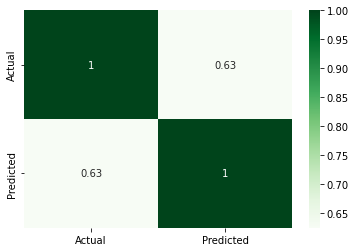

In [ ]:
sns.heatmap(final_test_dt.corr(), annot=True, cmap='Greens')

In [ ]:
from sklearn import tree

In [ ]:
#y_train = pd.DataFrame(y_train)

In [ ]:
# dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
# fig = plt.figure(figsize=(25,20))
# _ = tree.plot_tree(dt, 
#                    feature_names=x_train.columns,  
#                    class_names=y_train.columns,
#                    filled=True)

## Multiple linear regression

In [ ]:
lr = LinearRegression()

In [ ]:
# lr_x_train = x_train.drop(['log.Total_Volume'], axis=1)
# lr_x_test = x_test.drop(['log.Total_Volume'], axis=1)

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_train_lr = lr.predict(x_train)
final_train_lr = pd.DataFrame({'Actual':y_train, "Predicted":y_pred_train_lr})
#r2_score(y_train, y_pred_train_lr)
np.sqrt(mean_squared_error(y_train, y_pred_train_lr))

0.25128002264381966

In [ ]:
y_pred_test_lr = lr.predict(x_test)
final_test_lr = pd.DataFrame({'Actual':y_test, "Predicted":y_pred_test_lr})
#r2_score(y_test, y_pred_test_lr)
np.sqrt(mean_squared_error(y_test, y_pred_test_lr))

0.31519589958673105

In [ ]:
mean_squared_error(y_train, y_pred_train_lr)
# training MSE

0.06314164977987852

In [ ]:
mean_squared_error(y_test, y_pred_test_lr)
# testing MSE

0.09934845511628863

In [ ]:
final_test_lr.head(7)

,Actual,Predicted
14207,1.30,1.272468
14208,1.48,1.086225
14209,1.34,1.164762
14210,1.13,1.182956
14211,1.33,1.186405
14212,1.56,1.241633
14213,1.52,1.158501


In [ ]:
np.mean(((np.abs(final_test_lr.Actual-final_test_lr.Predicted))/final_test_lr.Actual)*100)

15.420789627572235

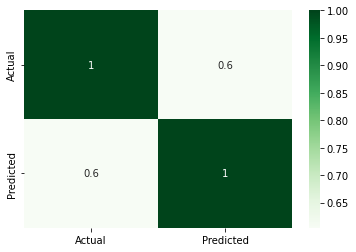

In [ ]:
sns.heatmap(final_test_lr.corr(), annot=True, cmap='Greens')

## Random Forest

In [ ]:
# Applying Random Forest
rf_random = RandomForestRegressor(max_depth= 25, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=1000)



> Hyper parameter tuning 

In [ ]:
# # No. of trees in a random forest
# n_estimators = [int(i) for i in range(100,1201,100)]

# # No. of features to consider at every split
# max_features = ['auto', 'sqrt']

# # Maximum number of levels in a tree
# max_depth = [i for i in np.linspace(start=5, stop=30, num=6)]

# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10, 15, 100]

# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 5, 10]

In [ ]:
# random_grid = {
#     'n_estimators': n_estimators,
#     'max_features': max_features,
#     'max_depth': max_depth,
#     'min_samples_split': min_samples_split,
#     'min_samples_leaf': min_samples_leaf
# }

In [ ]:
# random_grid

{'max_depth': [5.0, 10.0, 15.0, 20.0, 25.0, 30.0],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 5, 10],
 'min_samples_split': [2, 5, 10, 15, 100],
 'n_estimators': [100,
  200,
  300,
  400,
  500,
  600,
  700,
  800,
  900,
  1000,
  1100,
  1200]}

In [ ]:
# rf_random = RandomizedSearchCV(estimator=rf,
#                                param_distributions=random_grid,
#                                scoring = 'neg_mean_squared_error',
#                                n_jobs = 1,
#                                random_state = 42,
#                                verbose=2,
#                                cv=5)

In [ ]:
# training phase
# rf_random.fit(x_train,y_train)

In [ ]:
# Best combination of paramaters 
# rf_random.best_params_

{'max_depth': 25.0,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 1000}

In [ ]:
# {'max_depth': 25.0,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 1,
#  'min_samples_split': 2,
#  'n_estimators': 1000}

In [ ]:
rf_random.fit(x_train, y_train)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [ ]:
import pickle

In [ ]:
with open('model2.pkl','wb') as files:
  pickle.dump(rf_random, files)

In [ ]:
y_pred_train_rf = rf_random.predict(x_train)
final_train = pd.DataFrame({'Actual':y_train, "Predicted":y_pred_train_rf})
#r2_score(y_train, y_pred_train_rf)
np.sqrt(mean_squared_error(y_train, y_pred_train_rf))

0.03950252044800875

In [ ]:
y_pred_test_rf = rf_random.predict(x_test)
final_test_rf = pd.DataFrame({'Actual':y_test, "Predicted":y_pred_test_rf})
#r2_score(y_test, y_pred_test_rf)
np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

0.26303386995200867

In [ ]:
final_test_rf.head(7)

,Actual,Predicted
14207,1.30,1.325997
14208,1.48,1.440384
14209,1.34,1.333776
14210,1.13,1.138789
14211,1.33,1.345167
14212,1.56,1.574657
14213,1.52,1.571580


In [ ]:
# mean absolute error for random forest model
np.mean(((np.abs(final_test_rf.Actual-
                 final_test_rf.Predicted))/
         final_test_rf.Actual)*100)

12.383848315898787

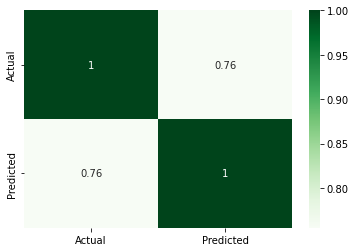

In [ ]:
sns.heatmap(final_test_rf.corr(), annot=True, cmap='Greens')

> Suggesion: split the test as 2017 data and 2018 data seperately and to check the mean absolute error percentage, to analyze whether the time series data has an impact on the 12% of mae% in the original test set. 

In [ ]:
x_test2017 = x_test[x_test['year']==2017]

In [ ]:
x_test2018 = x_test[x_test['year']==2018]

In [ ]:
y_test2017 = test.loc[test.year == 2017, ['AveragePrice']]
# convert dataframe to series
y_test2017 = y_test2017.loc[:,'AveragePrice']

In [ ]:
x_test2017.shape

(2309, 12)

In [ ]:
y_test2017.shape

(2309,)

In [ ]:
y_test2018 = test.loc[test.year == 2018, ['AveragePrice']]
# convert dataframe to series
y_test2018 = y_test2018.loc[:,'AveragePrice']

In [ ]:
y_pred_test_rf2017 = rf_random.predict(x_test2017)
final_test_rf2017 = pd.DataFrame({'Actual':y_test2017, "Predicted":y_pred_test_rf2017})
#r2_score(y_test, y_pred_test_rf)
#np.sqrt(mean_squared_error(y_test2017, y_pred_test_rf2017))
## mean absolute error percentage
np.mean(((np.abs(y_test2017-
                 y_pred_test_rf2017))/
         y_test2017)*100)

12.70782704387198

In [ ]:
y_pred_test_rf2017.shape

(2309,)

In [ ]:
y_pred_test_rf2018 = rf_random.predict(x_test2018)
final_test_rf2018 = pd.DataFrame({'Actual':y_test2018, "Predicted":y_pred_test_rf2018})
#r2_score(y_test, y_pred_test_rf)
#np.sqrt(mean_squared_error(y_test2018, y_pred_test_rf2018))
## mean absolute error percentage
np.mean(((np.abs(y_test2018-
                 y_pred_test_rf2018))/
         y_test2018)*100)

11.852209007630185

> There is no big difference between the two years

In [ ]:
np.max(np.abs(y_pred_test_rf2018-y_test2018))

0.8591450000000032

In [ ]:
np.max(np.abs(y_pred_test_rf2017-y_test2017))

1.473739999999999

In [ ]:
final_test_rf2017.head()

,Actual,Predicted
0,1.30,1.325997
1,1.48,1.440384
2,1.34,1.333776
3,1.13,1.138789
4,1.33,1.345167


In [ ]:
final_test_rf2018.tail()

,Actual,Predicted
3576,1.82,1.834347
3577,1.04,1.441430
3578,1.41,1.684140
3579,1.60,1.436786
3580,1.62,1.641900


In [ ]:
import xgboost

In [ ]:
print(xgboost.__version__)

0.90


In [ ]:
!pip install xgboost==1.0.1

In [ ]:
print(xgboost.__version__)

1.0.1


## XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
model = XGBRegressor()

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

In [ ]:
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 0.083 (0.002)


In [ ]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)

In [ ]:
y_pred_train_xg = model.predict(x_train)
final_train = pd.DataFrame({'Actual':y_train, "Predicted":y_pred_train_xg})
#r2_score(y_train, y_pred_train_xg)
np.sqrt(mean_squared_error(y_train, y_pred_train_xg))

0.0703282650708739

In [ ]:
r2_score(y_train, y_pred_train_xg)

0.9662787351628949

In [ ]:
y_pred_test_xg = model.predict(x_test)
final_test_xg = pd.DataFrame({'Actual':y_test, "Predicted":y_pred_test_xg})
#r2_score(y_test, y_pred_test_xg)
np.sqrt(mean_squared_error(y_test, y_pred_test_xg))

0.28269427979544665

In [ ]:
r2_score(y_test, y_pred_test_xg)

0.4910117889161556

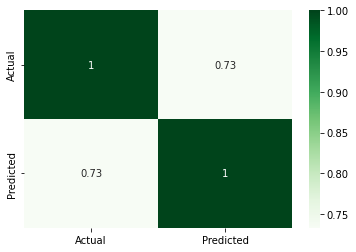

In [ ]:
sns.heatmap(final_test_xg.corr(), annot=True, cmap='Greens')

> **Finally considering all the heat maps, 'Random Forest regressor' gives a better prediction.**

> **Comparing all the methods with test root mean squared error,**
* ***multiple linear regression***
* ***ridge regression***
* ***lasso regression***
* ***elasticnet regression***
* ***decision tree***
* ***random forest*** 

**random forest model suits best.**

> But notice that the daaset is time series related. Therefore using **'time series regression'** will be the most suitable one. 


In [ ]:
# log.Total_Volume	log.X4046	log.X4225	log.X4770	log.Small_Bags	log.Large_Bags	log.XLarge_Bags	Month_Ex

In [ ]:
import math

In [ ]:
type = int(input('input type (conventional-0, organic-1): '))
year = int(input('year: '))
region = int(input('region: '))
date_new = int(input('Date new: '))
log.Total_Volume = math.log(int(input('Total volume: '))+2)
log.x4046 = math.log(int(input('x4046 total: '))+2)
log.X4225	= math.log(int(input('x4225 total: '))+2)
log.X4770	= math.log(int(input('x4770 total: '))+2)
log.Small_Bags	= math.log(int(input('Total small bags: '))+2)
log.Large_Bags	= math.log(int(input('Total large bags: '))+2)
log.XLarge_Bags	= math.log(int(input('Total Xlarge bags: '))+2)
Month_Ex = int(input('month: '))

input type (conventional-0, organic-1): 0
year: 2019
region: 26
Date new: 170
Total volume: 36521


NameError: ignored

In [ ]:
data = pd.DataFrame([type, year, region, date_new, log_Total_Volume, log_x4046, log_X4225, log_X4770, log_Small_Bags, log_Large_Bags, log_XLarge_Bags, Month_Ex])

In [ ]:
frame = [x_test, data]
avo2 = pd.concat(frame, ignore_index=True)

In [ ]:
avo2.head()

,0,Month_Ex,date_new,log.Large_Bags,log.Small_Bags,log.Total_Volume,log.X4046,log.X4225,log.X4770,log.XLarge_Bags,region,type,year
0,NaN,8.0,136.0,10.093078,10.295957,11.463115,7.748934,10.535087,5.393628,7.101478,23.0,0.0,2017.0
1,NaN,8.0,136.0,10.786238,10.562380,13.124671,12.740190,11.078935,5.788062,8.969090,24.0,0.0,2017.0
2,NaN,8.0,136.0,11.716401,13.660556,14.882826,13.306671,14.056795,10.194487,10.230057,25.0,0.0,2017.0
3,NaN,8.0,136.0,9.460197,11.364160,12.402980,11.572897,10.511345,3.936130,7.353088,26.0,0.0,2017.0
4,NaN,8.0,136.0,9.281429,10.948063,12.392484,11.775316,10.438327,3.828641,9.129347,27.0,0.0,2017.0


In [ ]:
avo2.loc[3592]

0                   5.0
Month_Ex            NaN
date_new            NaN
log.Large_Bags      NaN
log.Small_Bags      NaN
log.Total_Volume    NaN
log.X4046           NaN
log.X4225           NaN
log.X4770           NaN
log.XLarge_Bags     NaN
region              NaN
type                NaN
year                NaN
Name: 3592, dtype: float64

In [ ]:
pred = rf_random.predict(data)
final_train = pd.DataFrame({'Actual':y_train, "Predicted":pred})
#r2_score(y_train, y_pred_train_xg)
np.sqrt(mean_squared_error(y_train, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


ValueError: ignored